In [1]:
import random
import pandas as pd
import numpy as np
import scipy as sp
import glob
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.pyplot import *
import matplotlib as mpl
import math
mpl.use('pdf')

In [2]:
path = ""
all_files = glob.glob(os.path.join(path, "*.csv")) #make list of paths
data={}

for file in all_files:
    file_name = os.path.splitext(os.path.basename(file))[0]  # Getting the file name without extension
    data[file_name] = pd.read_csv(file) # Reading the file content to create a DataFrame
    print(file_name)

data_cleaned (1)
data_cleaned (2)
data_cleaned (3)
data_cleaned (4)
data_cleaned


In [3]:
# enter in the file name of the CSV file
CFD_data_gap1 = data['CFD_results_taguchi_2%gap_27gpm_V5_cleaned_V1']
CFD_data_gap2 = data['CFD_results_taguchi_4%gap_27gpm_V5_cleaned_V1']


KeyError: 'CFD_results_taguchi_2%gap_27gpm_V5_cleaned_V1'

In [ ]:
temp_ID_array1 = []
temp_ID_array2 = []
ID1 = 0
ID2 = 0
counter1 = 0
counter2 = 0

for index, row in CFD_data_gap1.iterrows():
    if counter1 < 14:
        temp_ID_array1.append(ID1)
        counter1+=1
    else:
        temp_ID_array1.append(ID1)
        ID1+=1
        counter1 = 0

for index, row in CFD_data_gap2.iterrows():
    if counter2 < 14:
        temp_ID_array2.append(ID2)
        counter2+=1
    else:
        temp_ID_array2.append(ID2)
        ID2+=1
        counter2 = 0        
        
ID_geometry_gap1 = pd.Series(temp_ID_array1)
CFD_data_gap1['ID_geometry'] = ID_geometry_gap1
CFD_data_gap1

ID_geometry_gap2 = pd.Series(temp_ID_array2)
CFD_data_gap2['ID_geometry'] = ID_geometry_gap2
CFD_data_gap2

In [5]:
def find_max_power(speed_range, power_range, pressure_range):
    x = np.poly1d(speed_range[0:])
    y = np.poly1d(power_range[0:])
    z = np.poly1d(pressure_range[0:])
    
    poly_power = np.polyfit(x,y,2)
    poly_pressure = np.polyfit(x,z,2)
    
    c1 = np.poly1d(poly_power)
    c2 = np.poly1d(poly_pressure)
    crit = c1.deriv().r
    r_crit = crit[crit.imag==0].real
    test = c1.deriv(2)(r_crit) 

    # compute local minima 
    # excluding range boundaries
    x_max_power = r_crit[test<0]
    y_max_power = c1(x_max_power)
    z_max_power = c2(x_max_power)
    
    x_p = np.linspace(0, 1200, 50)
    y_p = np.polyval(poly_power, x_p)
    z_p = np.polyval(poly_pressure, x_p)


    
    return  x_max_power[0],y_max_power[0],z_max_power[0], x_p, y_p, z_p

In [6]:
def findMaxPower_per_geometry_per_GV(CFD_dataframe,geometry_ID, GV):
    ID_geometry = CFD_dataframe[CFD_dataframe['ID_geometry'] == geometry_ID]
    ID_geometry_GV = ID_geometry[ID_geometry['P1 - GV angle'] == GV]

    ID_geometry_GV_speed = ID_geometry_GV['P40 - angular speed'].tolist()
    ID_geometry_GV_power = ID_geometry_GV['P44 - power shaft output net'].tolist()
    ID_geometry_GV_pressure = ID_geometry_GV['P37 - total pressure drop'].tolist()
    ID_geometry_GV_pressure1 = np.array(ID_geometry_GV_pressure)
    
    return find_max_power(ID_geometry_GV_speed, ID_geometry_GV_power, ID_geometry_GV_pressure)[0], find_max_power(ID_geometry_GV_speed, ID_geometry_GV_power,  ID_geometry_GV_pressure)[1], find_max_power(ID_geometry_GV_speed, ID_geometry_GV_power,  ID_geometry_GV_pressure)[2], find_max_power(ID_geometry_GV_speed, ID_geometry_GV_power, ID_geometry_GV_pressure)[3], find_max_power(ID_geometry_GV_speed, ID_geometry_GV_power, ID_geometry_GV_pressure)[4], find_max_power(ID_geometry_GV_speed, ID_geometry_GV_power, ID_geometry_GV_pressure)[5], ID_geometry_GV_speed, ID_geometry_GV_power, ID_geometry_GV_pressure1



In [7]:
findMaxPower_per_geometry_per_GV(CFD_data_gap1,0, 20)
findMaxPower_per_geometry_per_GV(CFD_data_gap2,0, 20)

(290.9619670097143,
 49.236983021369696,
 45649.77558685784,
 array([   0.        ,   24.48979592,   48.97959184,   73.46938776,
          97.95918367,  122.44897959,  146.93877551,  171.42857143,
         195.91836735,  220.40816327,  244.89795918,  269.3877551 ,
         293.87755102,  318.36734694,  342.85714286,  367.34693878,
         391.83673469,  416.32653061,  440.81632653,  465.30612245,
         489.79591837,  514.28571429,  538.7755102 ,  563.26530612,
         587.75510204,  612.24489796,  636.73469388,  661.2244898 ,
         685.71428571,  710.20408163,  734.69387755,  759.18367347,
         783.67346939,  808.16326531,  832.65306122,  857.14285714,
         881.63265306,  906.12244898,  930.6122449 ,  955.10204082,
         979.59183673, 1004.08163265, 1028.57142857, 1053.06122449,
        1077.55102041, 1102.04081633, 1126.53061224, 1151.02040816,
        1175.51020408, 1200.        ]),
 array([  25.10246971,   28.99421874,   32.54401476,   35.75185777,
          38.61

,Geometry,GV(deg),Speed(2%),Speed(4%),Power(2%),Power(4%),Pressure(2%),Pressure(4%),Efficiency(2%),Efficiency(4%)
0,0,10,328.457657,304.218350,37.891033,31.886644,5.009682,4.541356,0.280132,0.260052
1,0,15,369.370116,324.519843,48.233029,38.589459,6.290764,5.440643,0.283973,0.262697
2,0,20,429.297136,290.961967,63.140582,49.236983,8.713427,6.620952,0.268384,0.275427
3,1,10,384.739282,345.677352,54.238038,41.735402,6.871571,5.787861,0.292337,0.267069
4,1,15,459.628543,398.445575,78.742812,53.454469,10.687917,8.138823,0.272869,0.243253


<Figure size 1080x2520 with 0 Axes>

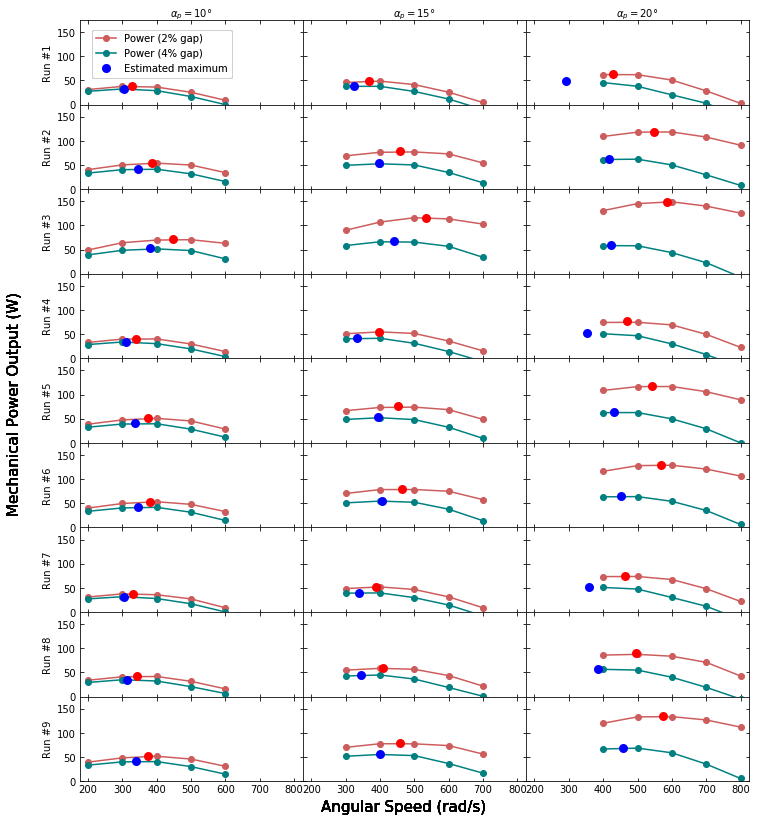

In [8]:
geometry_ID = list(range(0,9))
GV = [10, 15, 20]

geometry_list = []
GV_list = []

speed_list_gap1 = []
power_list_gap1 = []
pressure_list_gap1 = []
efficiency_list_gap1 = []

speed_list_gap2 = []
power_list_gap2 = []
pressure_list_gap2 = []
efficiency_list_gap2 = []
counter_plot = 0


fig1 = plt.figure(figsize = (15,35))
#fig1 = plt.figure()

figz, axs = plt.subplots(9,3, figsize=(12, 14), facecolor='w', edgecolor='k', sharey=True, sharex=True)
figz.subplots_adjust(hspace = 0, wspace=0)
#figz.tight_layout()
axs = axs.ravel()
new_angle = [10,15,20]
for i, geometry in enumerate(geometry_ID):

    for j, angle in enumerate(GV):
        
        geometry_list.append(geometry)
        GV_list.append(angle)
        
        # GAP 1
        speed_gap1 = findMaxPower_per_geometry_per_GV(CFD_data_gap1, geometry, angle)[0]
        power_gap1 = findMaxPower_per_geometry_per_GV(CFD_data_gap1, geometry, angle)[1]
        pressure_gap1 = findMaxPower_per_geometry_per_GV(CFD_data_gap1, geometry, angle)[2]*0.000145038
        speed_plot_gap1 = findMaxPower_per_geometry_per_GV(CFD_data_gap1, geometry, angle)[3]
        power_plot_gap1 = findMaxPower_per_geometry_per_GV(CFD_data_gap1, geometry, angle)[4]
        pressure_plot_gap1 = findMaxPower_per_geometry_per_GV(CFD_data_gap1, geometry, angle)[5] *0.000145038
        speed_original_gap1 = findMaxPower_per_geometry_per_GV(CFD_data_gap1, geometry, angle)[6]
        power_original_gap1 = findMaxPower_per_geometry_per_GV(CFD_data_gap1, geometry, angle)[7]
        pressure_original_gap1 =findMaxPower_per_geometry_per_GV(CFD_data_gap1, geometry, angle)[8] *0.000145038
        efficiency_gap1 = power_gap1/(27*pressure_gap1)
            
        speed_list_gap1.append(speed_gap1)
        power_list_gap1.append(power_gap1)
        pressure_list_gap1.append(pressure_gap1)
        efficiency_list_gap1.append(efficiency_gap1)
    
        # GAP 2
        speed_gap2 = findMaxPower_per_geometry_per_GV(CFD_data_gap2, geometry, angle)[0]
        power_gap2 = findMaxPower_per_geometry_per_GV(CFD_data_gap2, geometry, angle)[1]
        pressure_gap2 = findMaxPower_per_geometry_per_GV(CFD_data_gap2, geometry, angle)[2]*0.000145038
        speed_plot_gap2 = findMaxPower_per_geometry_per_GV(CFD_data_gap2, geometry, angle)[3]
        power_plot_gap2 = findMaxPower_per_geometry_per_GV(CFD_data_gap2, geometry, angle)[4]
        pressure_plot_gap2 = findMaxPower_per_geometry_per_GV(CFD_data_gap2, geometry, angle)[5] *0.000145038
        speed_original_gap2 = findMaxPower_per_geometry_per_GV(CFD_data_gap2, geometry, angle)[6]
        power_original_gap2 = findMaxPower_per_geometry_per_GV(CFD_data_gap2, geometry, angle)[7]
        pressure_original_gap2 =findMaxPower_per_geometry_per_GV(CFD_data_gap2, geometry, angle)[8] *0.000145038
        efficiency_gap2 = power_gap2/(27*pressure_gap2)
        
        speed_list_gap2.append(speed_gap2)
        power_list_gap2.append(power_gap2)
        pressure_list_gap2.append(pressure_gap2)
        efficiency_list_gap2.append(efficiency_gap2)


        axs[counter_plot].set_xlim([175,825])
        axs[counter_plot].set_ylim([0,175])
        axs[counter_plot].tick_params(axis = 'both' , direction='in', top='on', right='on')
        
        #axs[counter_plot].plot(speed_plot_gap1 , power_plot_gap1, '-', color='indianred')
       
        #axs[counter_plot].plot(speed_plot_gap2 , power_plot_gap2, '-', color='teal')
        axs[counter_plot].plot(speed_original_gap1, power_original_gap1, 'o-', color='indianred')
        axs[counter_plot].plot(speed_original_gap2, power_original_gap2, 'o-', color='teal')
        axs[counter_plot].plot(speed_gap2 , power_gap2, 'o', marker='o', markeredgewidth=2,color='blue',markeredgecolor='blue', markersize=7, label='max pressure')
        axs[counter_plot].plot(speed_gap1 , power_gap1, 'o', marker='o', markeredgewidth=2,color='red',markeredgecolor='red', markersize=7, label='max pressure')
        
        if i == 0:
            axs[counter_plot].set_xlabel(r'$\alpha_p = {0:d}$'.format(j*5 + 10)+r'$\degree$')
            axs[counter_plot].xaxis.set_label_position('top')
        if j == 0:
            axs[counter_plot].set_ylabel("Run #{0:d}".format(i + 1))
    #ax2.set_ylim([0, 100])
    #ax2.plot(speed_plot , pressure_plot, '-')
    #ax2.plot(speed_original, pressure_original, 'o')
    #ax2.plot(speed , pressure, 'o')
    #plt.plot(speed_plot , pressure_plot, '-')
    #plt.plot(speed , pressure, 'o')      
    #plt.xlabel('speed')
    #plt.ylabel('power')
    #plt.show()
        counter_plot = counter_plot + 1 
    figz.legend(labels= ['Power (2% gap)','Power (4% gap)', 'Estimated maximum'],  loc='upper left', bbox_to_anchor=(0.101, 0.7901))
    figz.text(0.05,0.5, "Mechanical Power Output (W)", ha="center", va="center", rotation=90, fontsize=15)
    figz.text(0.5,0.1, "Angular Speed (rad/s)", ha="center", va="center", rotation=0, fontsize=15)     

    
    DF_response = pd.DataFrame({
    'Geometry':geometry_list, 
    'GV(deg)':GV_list,
    'Speed(2%)': speed_list_gap1,
    'Speed(4%)': speed_list_gap2,
    'Power(2%)': power_list_gap1,
    'Power(4%)': power_list_gap2,
    "Pressure(2%)": pressure_list_gap1, 
    "Pressure(4%)": pressure_list_gap2,
    "Efficiency(2%)": efficiency_list_gap1,
    "Efficiency(4%)": efficiency_list_gap2
})

DF_response.head()

In [9]:
DF_response = pd.DataFrame({
    'Geometry':geometry_list, 
    'GV(deg)':GV_list,
    'Speed(2%)': speed_list_gap1,
    'Speed(4%)': speed_list_gap2,
    'Power(2%)': power_list_gap1,
    'Power(4%)': power_list_gap2,
    "Pressure(2%)": pressure_list_gap1, 
    "Pressure(4%)": pressure_list_gap2,
    "Efficiency(2%)": efficiency_list_gap1,
    "Efficiency(4%)": efficiency_list_gap2
})

DF_response

,Geometry,GV(deg),Speed(2%),Speed(4%),Power(2%),Power(4%),Pressure(2%),Pressure(4%),Efficiency(2%),Efficiency(4%)
0,0,10,328.457657,304.218350,37.891033,31.886644,5.009682,4.541356,0.280132,0.260052
1,0,15,369.370116,324.519843,48.233029,38.589459,6.290764,5.440643,0.283973,0.262697
2,0,20,429.297136,290.961967,63.140582,49.236983,8.713427,6.620952,0.268384,0.275427
3,1,10,384.739282,345.677352,54.238038,41.735402,6.871571,5.787861,0.292337,0.267069
4,1,15,459.628543,398.445575,78.742812,53.454469,10.687917,8.138823,0.272869,0.243253
5,1,20,548.005289,418.121944,119.017731,62.574243,20.634366,12.492743,0.213627,0.185513
6,2,10,447.314847,380.016499,71.218780,52.257532,9.564719,7.479003,0.275777,0.258786
7,2,15,533.744460,441.193556,115.883707,67.720492,17.723959,11.872635,0.242157,0.211256
8,2,20,584.574925,423.281675,148.220102,59.116340,46.767445,19.842716,0.117382,0.110342
9,3,10,340.061564,309.505142,40.679466,33.101181,5.303534,4.678399,0.284084,0.262049


In [10]:
def func_SNR_slope(response_table, SNR_or_slope, response):
    
    y_sqr2 = []; y_sqr4 = []; y_tot = []
    M_sqr = []; MxY2 = []; MxY4 = []; MxY_tot = []

    lin_eq2 = []; lin_eq4 = []

    S_tot = []; S_beta = []; S_betaxN = []; S_L = []; S_e = []; S_N = []
    V_tot = []; V_beta = []; V_betaxN = []; V_L = []; V_e = []; V_N = []

    k =3; l = 2
    r = []

    beta = [] 
    slope = []; slope1 = []
    SNR = []
    
    
    
    if response == "power":
        response1 = "Power(2%)"
        response2 = "Power(4%)"
    
    elif response == "pressure":
        response1 = "Pressure(2%)"
        response2 = "Pressure(4%)"
    
    GB_geom = response_table.groupby(['Geometry'])
    GB_geom.get_group(0)
    
    for g in range(len(response_table['Geometry'].unique().tolist())):
        
        for degree in range(len(response_table['GV(deg)'].unique().tolist())):
            M_sqr.append(GB_geom.get_group(g)['GV(deg)'].tolist()[degree]**2 )
        
            MxY2.append( GB_geom.get_group(g)['GV(deg)'].tolist()[degree] * GB_geom.get_group(g)[response1].tolist()[degree] )
            MxY4.append( GB_geom.get_group(g)['GV(deg)'].tolist()[degree] * GB_geom.get_group(g)[response2].tolist()[degree] )
        
            y_tot.append( GB_geom.get_group(g)[response1].tolist()[degree] + GB_geom.get_group(g)[response2].tolist()[degree]  )
            MxY_tot.append( GB_geom.get_group(g)['GV(deg)'].tolist()[degree] * y_tot[-1])
    
            y_sqr2.append((GB_geom.get_group(g)[response1].tolist()[degree])**2)
            y_sqr4.append((GB_geom.get_group(g)[response2].tolist()[degree])**2)

    
        r.append(sum(M_sqr))
        M_sqr = []
    
        lin_eq2.append(sum(MxY2)) 
        lin_eq4.append(sum(MxY4))
        MxY2 = []
        MxY4 = []
    
        S_tot.append(sum(y_sqr2) + sum(y_sqr4) )
        f_tot = k*l
        V_tot.append(S_tot[g]/f_tot)
        y_sqr2 = [] #reset the y_sqr2
        y_sqr4 = [] #reset the y_sqr4
     
    
        beta.append((1/(l*r[g]))*sum(MxY_tot))
    
    
        S_beta.append(   ((sum(MxY_tot))**2)/(r[g]*2)    )   
        f_beta = l
        V_beta.append(S_beta[g] / f_beta)
        MxY_tot = [] # reset the MxY_tot
    
    
        S_L.append(((lin_eq2[g]**2) + (lin_eq4[g]**2)) / r[g])
        f_L = l
        V_L.append(S_L[g]/f_L)
        
    
        #S_betaxN.append( ((lin_eq2[g] - lin_eq4[g])**2) / (l*r[g]))
        S_betaxN.append( S_L[g] - S_beta[g] )
        f_betaxN = l-1
        V_betaxN.append (S_betaxN[g] / f_betaxN)
    
    
        S_e.append( S_tot[g] - S_beta[g] - S_betaxN[g] )
        f_e = l*(k-1)
        V_e.append(S_e[g]/f_e)
        
    
        S_N.append( S_tot[g] - S_beta[g])
        f_N = k*l-1
        V_N.append(S_N[g]/f_N)        
    
        SNR.append(10*math.log10( (1/(l*r[g])) * (S_beta[g] - V_e[g])/V_N[g]) )
        slope.append(10*math.log10((1/(l*r[g]))*(S_beta[g] - V_N[g])))
        #slope.append((10**(slope1[g]/10))**0.5)
        
    if SNR_or_slope == 'SNR':
        return(SNR)
    elif SNR_or_slope == 'slope':
        return(slope)
    
print(func_SNR_slope(DF_response,'SNR','power'))
print(func_SNR_slope(DF_response,'SNR','pressure'))
print(func_SNR_slope(DF_response,'slope','power'))
print(func_SNR_slope(DF_response,'slope','pressure'))

[-7.4077346488863896, -12.923332394691304, -15.554341499943249, -9.121419015545683, -12.582653853920755, -13.429460982202247, -8.71975657224024, -10.113058041186346, -13.464503204215355]
[-7.151820941506807, -12.756177365478234, -18.13093173465966, -6.8181030854194535, -12.226713808622824, -13.849722857470017, -6.657491886013846, -8.309085019656713, -14.12591042451582]
[9.319150713370455, 13.07090884982032, 14.871799136114026, 10.295078620399527, 12.913219369718018, 13.440041029710528, 10.02172771711112, 11.141336427350947, 13.608210247159269]
[-8.001807586170539, -2.6837153362467654, 2.364345907115511, -6.850994734569894, -3.1941545831484324, -2.039207456350008, -7.163832236411919, -5.812235226353315, -2.0308013490518824]


## CREATE: INNER, OUTER, COMBINED ARRAY

In [11]:
# INNER ARRAY
DF_inner_array = pd.DataFrame({
    #'SV_radius':CFD_data_gap2['P3 - SV radius'], 
    #'SV_angle':CFD_data_gap2['P4 - SV angle'], 
    #'SV_fillet1': CFD_data_gap2['P5 - SV fillet1'], 
    #'SV_fillet2': CFD_data_gap2['P6 - SV fillet2'], 

    'GV_profile': CFD_data_gap2['P12 - GV profile'], 
    "GV_length": CFD_data_gap2['P10 - GV len'], 
    "GV_offset": CFD_data_gap2['P11 - GV off angle'],
    'GV_num': CFD_data_gap2['P8 - GV num'] 
})

DF_inner_array = DF_inner_array.drop_duplicates()
DF_inner_array = DF_inner_array.reset_index(drop = True)
DF_inner_array['GV_offset'] = DF_inner_array['GV_offset'].replace(to_replace = 350, value = -10)
DF_inner_array['GV_profile'] = DF_inner_array['GV_profile'].replace(to_replace = 10, value = 0)
DF_inner_array['GV_profile'] = DF_inner_array['GV_profile'].replace(to_replace = [24,44], value = [2,4])
DF_inner_array

col_names = list(DF_inner_array.columns) 
print(col_names)


# OUTER ARRAY
DF_outer_array = pd.DataFrame({
    'SNR_power':func_SNR_slope(DF_response, 'SNR', 'power'),
    'slope_power':func_SNR_slope(DF_response, 'slope', 'power'),
    'SNR_pressure':func_SNR_slope(DF_response, 'SNR', 'pressure'),
    'slope_pressure':func_SNR_slope(DF_response, 'slope', 'pressure')
})


# COMPLETE ARRAY
DF_array = pd.concat([DF_inner_array,DF_outer_array], axis=1,sort = False)
DF_array

['GV_profile', 'GV_length', 'GV_offset', 'GV_num']


,GV_profile,GV_length,GV_offset,GV_num,SNR_power,slope_power,SNR_pressure,slope_pressure
0,0,15.15,-10,10,-7.407735,9.319151,-7.151821,-8.001808
1,0,18.00,10,12,-12.923332,13.070909,-12.756177,-2.683715
2,0,20.00,0,14,-15.554341,14.871799,-18.130932,2.364346
3,2,18.00,0,10,-9.121419,10.295079,-6.818103,-6.850995
4,2,20.00,-10,12,-12.582654,12.913219,-12.226714,-3.194155
5,2,15.15,10,14,-13.429461,13.440041,-13.849723,-2.039207
6,4,20.00,10,10,-8.719757,10.021728,-6.657492,-7.163832
7,4,15.15,0,12,-10.113058,11.141336,-8.309085,-5.812235
8,4,18.00,-10,14,-13.464503,13.608210,-14.125910,-2.030801


# CALCULATE, PLOT, DATAFRAME: MEAN SNR & SLOPE

In [12]:
#DF_inner_array = pd.read_csv("SNR confirmation data from textbook.csv") 
#DF_inner_array

In [13]:
factor_name = list(DF_inner_array)
factor_level = []
counter = 0
for control in factor_name:
    factor_level.append(DF_inner_array[control].unique().tolist())
    factor_level[counter].sort()
    counter += 1
factor_level



[[0, 2, 4], [15.15, 18.0, 20.0], [-10, 0, 10], [10, 12, 14]]

### CALCULATE MEAN

In [14]:
def func_mean_SNR_slope(DF_array, SNR_or_slope, response):
        
    selected_factor = []
    selected_array = []
    selected_SNR = []
    average_SNR = []
    plotting_SNR = []
    
    if response == 'power':
        
        if SNR_or_slope == 'SNR': power = 'SNR_power'
        elif SNR_or_slope == 'slope': power = 'slope_power'
        
        counter = 0
        for level in factor_level:    
            for i in level:
                selected_factor = factor_name[counter]
                selected_SNR = DF_array.groupby(selected_factor).get_group(i)[power]
                average_SNR.append(sum(selected_SNR) / len(selected_SNR))
            counter +=1
    
    
    elif response == 'pressure':
        
        if SNR_or_slope == 'SNR': pressure = 'SNR_pressure'
        elif SNR_or_slope == 'slope': pressure = 'slope_pressure'

        counter = 0
        for level in factor_level:    
            for i in level:
                selected_factor = factor_name[counter]
                selected_SNR = DF_array.groupby(selected_factor).get_group(i)[pressure]
                average_SNR.append(sum(selected_SNR) / len(selected_SNR))
            counter +=1
    
    return(average_SNR)

### PLOT MEAN

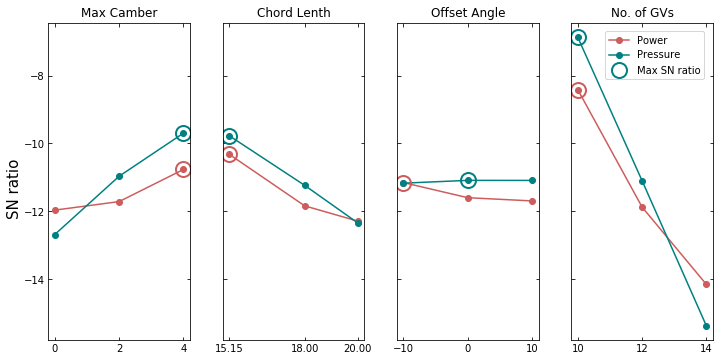

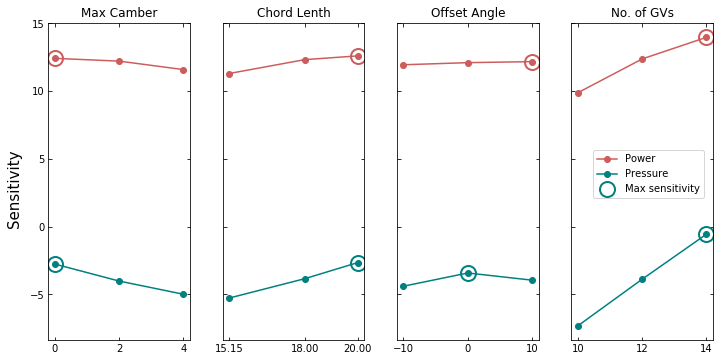

In [15]:
from matplotlib.ticker import MultipleLocator

def func_plot_mean_SNR_slope(DF_array, SNR_or_slope):
    factors_title = ['Max Camber', 'Chord Lenth', 'Offset Angle', 'No. of GVs']
    selected_factor = []
    selected_array = []
    selected_SNR = []
    average_SNR = []
    plotting_SNR = []
    selected_factor2 = []
    selected_array2 = []
    selected_SNR2 = []
    average_SNR2 = []
    plotting_SNR2 = []

    if SNR_or_slope == 'SNR':
        
        figz, axs = plt.subplots(1,4, figsize=(10, 5), facecolor='w', edgecolor='k', sharey=True)
        figz.subplots_adjust(hspace = 0, wspace=0)
        figz.tight_layout()
        axs = axs.ravel()
        counter = 0
        
        for level in factor_level:
            for i in level:
                selected_factor = factor_name[counter]
                selected_factor2 = factor_name[counter]
                selected_SNR = DF_array.groupby(selected_factor).get_group(i)['SNR_power']
                selected_SNR2 = DF_array.groupby(selected_factor2).get_group(i)['SNR_pressure']
                average_SNR.append(sum(selected_SNR) / len(selected_SNR))
                average_SNR2.append(sum(selected_SNR2) / len(selected_SNR2))
                plotting_SNR.append(sum(selected_SNR) / len(selected_SNR))
                plotting_SNR2.append(sum(selected_SNR2) / len(selected_SNR2))
            
            plotting_max_y = max(plotting_SNR)
            plotting_max_y2 = max(plotting_SNR2)
            plotting_max_x = level[plotting_SNR.index(max(plotting_SNR))]
            plotting_max_x2 = level[plotting_SNR2.index(max(plotting_SNR2))]
            
            
            axs[counter].plot(level,plotting_SNR, 'o-', color='indianred', label='power')
            axs[counter].plot(level,plotting_SNR2, 'o-', color='teal',label='pressure')
            axs[counter].plot(plotting_max_x2 ,plotting_max_y2, marker='o', markeredgewidth=2,color='none',markeredgecolor='teal', markersize=15, label='max pressure')
            axs[counter].plot(plotting_max_x ,plotting_max_y, marker='o', markeredgewidth=2,color='none',markeredgecolor='indianred', markersize=15, label='max power')
            
            axs[counter].set_title(factors_title[counter])
            axs[counter].set_xticks(level)
            axs[counter].tick_params(axis = 'both' , direction='in', top='on', right='on')
           
            plotting_SNR = []
            plotting_SNR2 = []
            counter +=1

        figz.legend(labels= ['Power','Pressure', 'Max SN ratio'],  loc=1, bbox_to_anchor=(.985, 0.93))
        figz.text(0.0,0.5, "SN ratio", ha="center", va="center", rotation=90, fontsize=15)

    if SNR_or_slope == 'slope':
        
        figz, axs = plt.subplots(1,4, figsize=(10, 5), facecolor='w', edgecolor='k', sharey=True)
        figz.subplots_adjust(hspace = 0, wspace=0)
        figz.tight_layout()
        axs = axs.ravel()
        counter = 0
        
        for level in factor_level:
            for i in level:
                selected_factor = factor_name[counter]
                selected_factor2 = factor_name[counter]
                selected_SNR = DF_array.groupby(selected_factor).get_group(i)['slope_power']
                selected_SNR2 = DF_array.groupby(selected_factor2).get_group(i)['slope_pressure']
                average_SNR.append(sum(selected_SNR) / len(selected_SNR))
                average_SNR2.append(sum(selected_SNR2) / len(selected_SNR2))
                plotting_SNR.append(sum(selected_SNR) / len(selected_SNR))
                plotting_SNR2.append(sum(selected_SNR2) / len(selected_SNR2))
            
            plotting_max_y = max(plotting_SNR)
            plotting_max_y2 = max(plotting_SNR2)
            plotting_max_x = level[plotting_SNR.index(max(plotting_SNR))]
            plotting_max_x2 = level[plotting_SNR2.index(max(plotting_SNR2))]
            
            
            axs[counter].plot(level,plotting_SNR, 'o-', color='indianred', label='power')
            axs[counter].plot(level,plotting_SNR2, 'o-', color='teal',label='pressure')
            axs[counter].plot(plotting_max_x2 ,plotting_max_y2, marker='o', markeredgewidth=2,color='none',markeredgecolor='teal', markersize=15, label='max pressure')
            axs[counter].plot(plotting_max_x ,plotting_max_y, marker='o', markeredgewidth=2,color='none',markeredgecolor='indianred', markersize=15, label='max power')
            
            axs[counter].set_title(factors_title[counter])
            axs[counter].set_xticks(level)
            axs[counter].tick_params(axis = 'both' , direction='in', top='on', right='on')
           
            plotting_SNR = []
            plotting_SNR2 = []
            counter +=1

        figz.legend(labels= ['Power','Pressure', 'Max sensitivity'],  loc=1, bbox_to_anchor=(.985, 0.6))
        figz.text(0.0,0.5, "Sensitivity", ha="center", va="center", rotation=90, fontsize=15)
func_plot_mean_SNR_slope(DF_array, 'SNR')
func_plot_mean_SNR_slope(DF_array, 'slope')

In [16]:
def func_plot_mean_SNR_slope(DF_array, SNR_or_slope, response):
        
    selected_factor = []
    selected_array = []
    selected_SNR = []
    average_SNR = []
    plotting_SNR = []
    
    if response == 'power':
        
        if SNR_or_slope == 'SNR': power = 'SNR_power'
        elif SNR_or_slope == 'slope': power = 'slope_power'
        
        
        fig2 = plt.figure(figsize = (20,5))
        plt.title(SNR_or_slope + ' ' + response)
        counter = 0

        for level in factor_level:    
            for i in level:
                selected_factor = factor_name[counter]
                selected_SNR = DF_array.groupby(selected_factor).get_group(i)[power]
                average_SNR.append(sum(selected_SNR) / len(selected_SNR))
                plotting_SNR.append(sum(selected_SNR) / len(selected_SNR))


            plotting_max_y = max(plotting_SNR)
            plotting_max_x = level[plotting_SNR.index(max(plotting_SNR))]

            ax1 = fig2.add_subplot(1,len(factor_name),counter+1) 
            ax1.set_title(factor_name[counter])
            #ax1.set_ylim([-20,-10])
            ax1.plot(level,plotting_SNR, 'o-')
            ax1.plot(plotting_max_x ,plotting_max_y, 'X')

            plotting_SNR = []
            counter +=1
    
    
    elif response == 'pressure':
        
        if SNR_or_slope == 'SNR': pressure = 'SNR_pressure'
        elif SNR_or_slope == 'slope': pressure = 'slope_pressure'
        
        fig2 = plt.figure(figsize = (20,5))
        plt.title(SNR_or_slope + ' ' + response)
        counter = 0

        for level in factor_level:    
            for i in level:
                selected_factor = factor_name[counter]
                selected_SNR = DF_array.groupby(selected_factor).get_group(i)[pressure]
                average_SNR.append(sum(selected_SNR) / len(selected_SNR))
                plotting_SNR.append(sum(selected_SNR) / len(selected_SNR))

            
            plotting_max_y = max(plotting_SNR)
            plotting_max_x = level[plotting_SNR.index(max(plotting_SNR))]
            
            ax1 = fig2.add_subplot(1,len(factor_name),counter+1) 
            ax1.set_title(factor_name[counter])
            #ax1.set_ylim([-20,-10])
            ax1.plot(level,plotting_SNR, 'o-')
            ax1.plot(plotting_max_x ,plotting_max_y, 'X')

            plotting_SNR = []
            counter +=1

In [17]:
# calling the functions
mean_SNR_power = func_mean_SNR_slope(DF_array, 'SNR', 'power')
mean_slope_power = func_mean_SNR_slope(DF_array, 'slope', 'power')
mean_SNR_pressure = func_mean_SNR_slope(DF_array, 'SNR', 'pressure')
mean_slope_pressure = func_mean_SNR_slope(DF_array, 'slope', 'pressure')

# mean_SNR_power_plot = func_plot_mean_SNR_slope(DF_array, 'SNR', 'power')
# #mean_slope_power_plot = func_plot_mean_SNR_slope(DF_array, 'slope', 'power')
# #mean_SNR_pressure_plot = func_plot_mean_SNR_slope(DF_array, 'SNR', 'pressure')
# #mean_slope_pressure_plot = func_plot_mean_SNR_slope(DF_array, 'slope', 'pressure')

# print(mean_SNR_power,'\n',
#       mean_slope_power,'\n',
#       mean_SNR_pressure,'\n',
#       mean_slope_pressure)

### DATAFRAME MEAN

In [18]:
def func_DF_mean_SNR_slope(mean_SNR_slope):

    factor_level_mean = []; structured_factor_level_mean = []

    counter = 0 
    for factor in factor_level:
        for level in range(len(factor)):
            factor_level_mean.append(mean_SNR_slope[counter])
            counter += 1
        structured_factor_level_mean.append(factor_level_mean)
        factor_level_mean = []

    DF_mean_SNR_slope = pd.DataFrame(structured_factor_level_mean).transpose()
    DF_mean_SNR_slope.columns = factor_name

    return(DF_mean_SNR_slope)

In [19]:
def func_DF_rank_SNR_slope(DF_mean_SNR_slope, SNR_slope, power_pressure):
    
    delta = []
    max_col_val = []; max_col_level = []

    for header in list(DF_mean_SNR_slope):
        col_val = list(DF_mean_SNR_slope[header])
        delta.append(max(col_val) - min(col_val))
        max_col_val.append(max(col_val))

    DF_max_val = pd.DataFrame(max_col_val).transpose()
    DF_max_val.columns = factor_name
    DF_max_val.rename(index={0:'max value'},inplace=True)
    
    if SNR_slope == 'SNR':
        if power_pressure == 'power':
            DF_max_level = pd.DataFrame(DF_mean_SNR_power.idxmax(axis=0, skipna=True)).transpose() 
            DF_max_level.rename(index={0:'level'},inplace=True)
        if power_pressure == 'pressure':   
            DF_max_level = pd.DataFrame(DF_mean_SNR_pressure.idxmax(axis=0, skipna=True)).transpose()
            DF_max_level.rename(index={0:'level'},inplace=True)
    if SNR_slope == 'slope':
        if power_pressure == 'power':
            DF_max_level = pd.DataFrame(DF_mean_slope_power.idxmax(axis=0, skipna=True)).transpose()
            DF_max_level.rename(index={0:'level'},inplace=True)
        if power_pressure == 'pressure': 
            DF_max_level = pd.DataFrame(DF_mean_slope_pressure.idxmax(axis=0, skipna=True)).transpose()    
            DF_max_level.rename(index={0:'level'},inplace=True)
    
    
    DF_delta = pd.DataFrame(delta).transpose()
    DF_delta.columns = factor_name
    DF_delta.rename(index={0:'delta'},inplace=True)

    DF_rank = DF_delta.transpose().rank(ascending = False).transpose()
    DF_rank.rename(index={'delta':'rank'},inplace=True)

    DF_ranking = pd.concat([DF_max_val, DF_max_level, DF_delta, DF_rank], axis=0,sort = False)
    
    return(DF_ranking)

In [20]:
DF_mean_SNR_power = func_DF_mean_SNR_slope(mean_SNR_power)
print('Main Effects Plot - SNR Power')
print(DF_mean_SNR_power, '\n\n')
      
DF_mean_SNR_pressure = func_DF_mean_SNR_slope(mean_SNR_pressure)
print('Main Effects Plot - SNR Pressure')
print(DF_mean_SNR_pressure, '\n\n')

DF_mean_slope_power = func_DF_mean_SNR_slope(mean_slope_power)
print('Main Effects Plot - slope Power')
print(DF_mean_slope_power, '\n\n')

print('Main Effects Plot - slope Pressure')
DF_mean_slope_pressure = func_DF_mean_SNR_slope(mean_slope_pressure)
print(DF_mean_slope_pressure, '\n\n')

Main Effects Plot - SNR Power
   GV_profile  GV_length  GV_offset     GV_num
0  -11.961803 -10.316751 -11.151631  -8.416303
1  -11.711178 -11.836418 -11.596273 -11.873015
2  -10.765773 -12.285584 -11.690850 -14.149435 


Main Effects Plot - SNR Pressure
   GV_profile  GV_length  GV_offset     GV_num
0  -12.679643  -9.770210 -11.168148  -6.875805
1  -10.964847 -11.233397 -11.086040 -11.097325
2   -9.697496 -12.338379 -11.087797 -15.368855 


Main Effects Plot - slope Power
   GV_profile  GV_length  GV_offset     GV_num
0   12.420620  11.300176  11.946860   9.878652
1   12.216113  12.324733  12.102738  12.375155
2   11.590425  12.602249  12.177559  13.973350 


Main Effects Plot - slope Pressure
   GV_profile  GV_length  GV_offset    GV_num
0   -2.773726  -5.284417  -4.408921 -7.338878
1   -4.028119  -3.855170  -3.432961 -3.896702
2   -5.002290  -2.664547  -3.962252 -0.568554 




In [21]:
print('Rank - SNR Power')
print(func_DF_rank_SNR_slope(DF_mean_SNR_power, 'SNR', 'power'), '\n\n')

print('Rank  - SNR Pressure')
print(func_DF_rank_SNR_slope(DF_mean_SNR_pressure, 'SNR', 'pressure'), '\n\n')

print('Rank - slope Power')
print(func_DF_rank_SNR_slope(DF_mean_slope_power, 'slope', 'power'), '\n\n')

print('Rank  - slope Pressure')
print(func_DF_rank_SNR_slope(DF_mean_slope_pressure, 'slope', 'pressure'), '\n\n')



Rank - SNR Power
           GV_profile  GV_length  GV_offset    GV_num
max value  -10.765773 -10.316751 -11.151631 -8.416303
level        2.000000   0.000000   0.000000  0.000000
delta        1.196030   1.968833   0.539219  5.733132
rank         3.000000   2.000000   4.000000  1.000000 


Rank  - SNR Pressure
           GV_profile  GV_length  GV_offset    GV_num
max value   -9.697496   -9.77021 -11.086040 -6.875805
level        2.000000    0.00000   1.000000  0.000000
delta        2.982148    2.56817   0.082108  8.493050
rank         2.000000    3.00000   4.000000  1.000000 


Rank - slope Power
           GV_profile  GV_length  GV_offset     GV_num
max value   12.420620  12.602249  12.177559  13.973350
level        0.000000   2.000000   2.000000   2.000000
delta        0.830195   1.302073   0.230699   4.094698
rank         3.000000   2.000000   4.000000   1.000000 


Rank  - slope Pressure
           GV_profile  GV_length  GV_offset    GV_num
max value   -2.773726  -2.664547  -3.43296

In [22]:
total_mean_slope_power = sum(mean_slope_power)/len(mean_slope_power)
print('Mean Power: ',total_mean_slope_power)

total_mean_slope_pressure = sum(mean_slope_pressure)/len(mean_slope_pressure)
print('Mean Pressure: ',total_mean_slope_pressure)

Mean Power:  12.075719123417135
Mean Pressure:  -3.9347114001319157


In [23]:
def func_predict_SNR_slope(DF_mean_SNR_slope, selected_factor_level, index):
    counter = 0
    list1 = []
    
    if index == 0:
        DF_mean = DF_mean_SNR_power
        mean = mean_SNR_power
    if index ==1:
        DF_mean = DF_mean_SNR_pressure
        mean = mean_SNR_pressure
    if index ==2:
        DF_mean = DF_mean_slope_power
        mean = mean_slope_power
    if index ==3:
        DF_mean = DF_mean_slope_pressure
        mean = mean_slope_pressure
        
    for header in list(DF_mean):
        selected_factor_value = DF_mean[header].iloc[selected_factor_level[counter]]
        total_mean_SNR_slope = sum(mean)/len(mean)
        list1.append(selected_factor_value-total_mean_SNR_slope)
        counter+=1
    return(sum(list1) + total_mean_SNR_slope)


In [24]:
#selected_factor_level = [1, 0, 0, 0] # Original
selected_factor_level = [0, 0, 1, 1]
#selected_factor_level = [0, 2, 2, 2] # Slope power
print('Max SNR Power (discrete): ', func_predict_SNR_slope(DF_mean_SNR_power, selected_factor_level, 0), '\n\n')

#selected_factor_level = [1, 0, 0, 0]
print('Max SNR Pressure (discrete): ', func_predict_SNR_slope(DF_mean_SNR_pressure, selected_factor_level, 1), '\n\n')

#selected_factor_level = [1, 0, 0, 0]
print('Max Slope Power (discrete): ', func_predict_SNR_slope(DF_mean_slope_power, selected_factor_level, 2), '\n\n')

#selected_factor_level = [1, 0, 0, 0]
print('Max Slope Pressure (discrete): ', func_predict_SNR_slope(DF_mean_slope_pressure, selected_factor_level, 3), '\n\n')

Max SNR Power (discrete):  -11.309088283146009 


Max SNR Pressure (discrete):  -11.291232590142817 


Max Slope Power (discrete):  11.971531196578765 


Max Slope Pressure (discrete):  -3.5836712941815407 




## Surrogate Modeling using Kriging

In [25]:
DF_array = DF_array[['GV_profile', 'GV_length','GV_offset', 'GV_num', 'SNR_power','slope_power','SNR_pressure','slope_pressure']]
DF_array

,GV_profile,GV_length,GV_offset,GV_num,SNR_power,slope_power,SNR_pressure,slope_pressure
0,0,15.15,-10,10,-7.407735,9.319151,-7.151821,-8.001808
1,0,18.00,10,12,-12.923332,13.070909,-12.756177,-2.683715
2,0,20.00,0,14,-15.554341,14.871799,-18.130932,2.364346
3,2,18.00,0,10,-9.121419,10.295079,-6.818103,-6.850995
4,2,20.00,-10,12,-12.582654,12.913219,-12.226714,-3.194155
5,2,15.15,10,14,-13.429461,13.440041,-13.849723,-2.039207
6,4,20.00,10,10,-8.719757,10.021728,-6.657492,-7.163832
7,4,15.15,0,12,-10.113058,11.141336,-8.309085,-5.812235
8,4,18.00,-10,14,-13.464503,13.608210,-14.125910,-2.030801


#### Train the Kriging Model using Response from Taguchi

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from smt.surrogate_models import KRG

NP_matrix = np.array(DF_array.values)
xt = np.array(NP_matrix[:, 0:4])
yt_power = np.array(NP_matrix[:, 5])
yt_pressure = np.array(NP_matrix[:, 6])

sm_power = KRG(theta0=[2],print_training=False,print_global=False)  
sm_power.set_training_values(xt, yt_power)
sm_power.train()

sm_pressure = KRG(theta0=[2],print_training=False,print_global=False)  
sm_pressure.set_training_values(xt, yt_pressure)
sm_pressure.train()

#### Plotting Linear Interpolation Representation of Kriging (Sampled using Full Factorial or LHS)

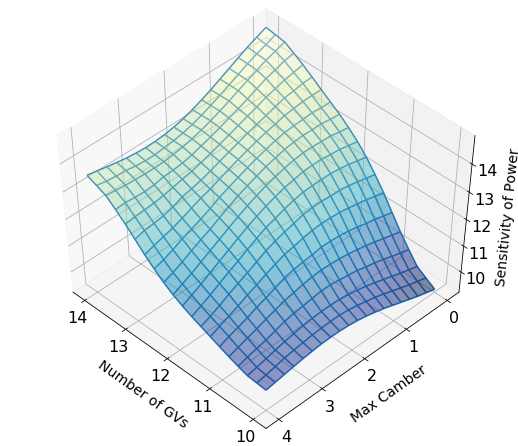

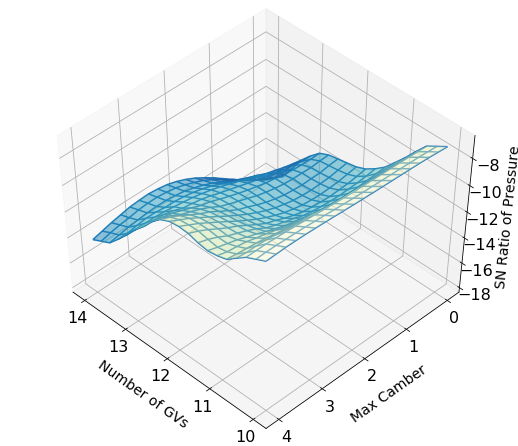

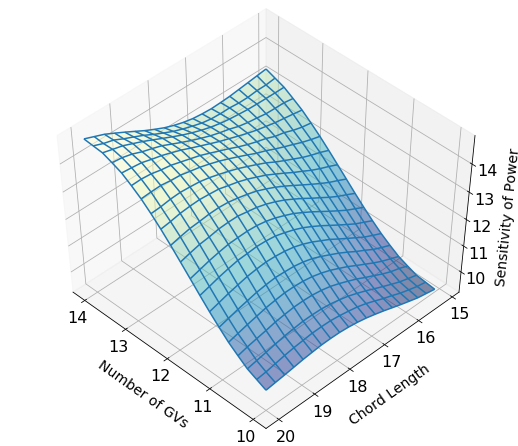

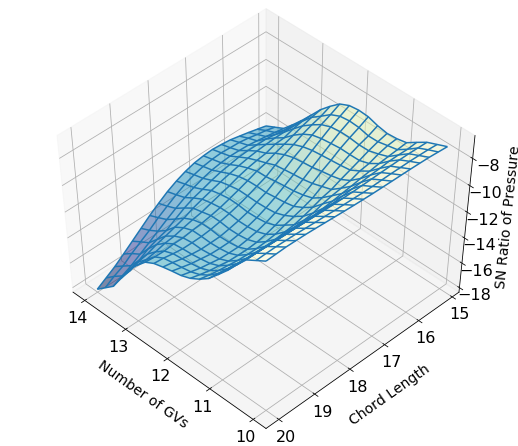

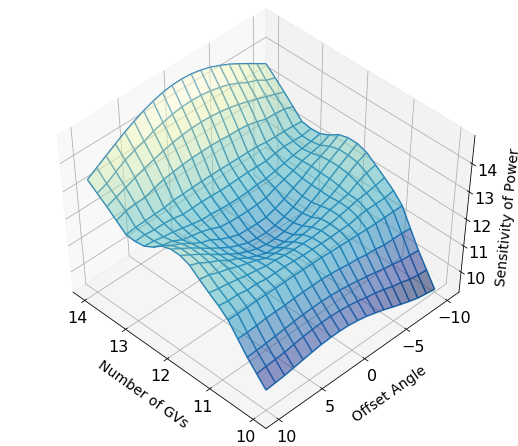

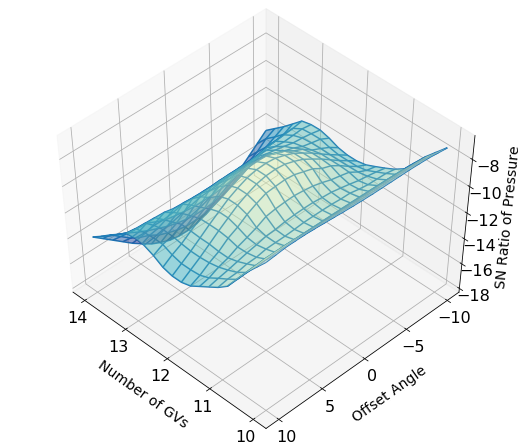

In [31]:
def part_rep_kriging(DF_array, ind_f0, ind_f1, ind_r, lim_f0, lim_f1):

    #DF_array = complete array that contains the factor levels and the response output
    #ind_f1(1,2) = index of the factor of the dataframe
    #ind_r = index of the response of the dataframe
    #lim_f0 = limits of the factor in a list [lower, upper]
    
    import numpy as np
    import matplotlib.pyplot as plt
    from smt.surrogate_models import KRG
    from smt.sampling_methods import FullFactorial
    from smt.sampling_methods import LHS
    from mpl_toolkits import mplot3d
    from mpl_toolkits.mplot3d import axes3d
    from scipy.interpolate import griddata    
    
    
    #Convert Panda DF into NP arrays
    NP_matrix = np.array(DF_array.values)
    xt_p = np.array(NP_matrix[:, [ind_f0,ind_f1]])
    yt_p = np.array(NP_matrix[:, ind_r])
#     xt_a = np.array(NP_matrix[:, 0:4])
#     yt_a = np.array(NP_matrix[:, ind_r])
    
    #Train the (P)ARTIAL REPRESENTATION of KRIGING (Full Factorial is used)
    sm_p = KRG(theta0=[2],print_training=False, print_global=False)  
    sm_p.set_training_values(xt_p, yt_p)
    sm_p.train()
    
    #Train the (A)CTUAL REPRESENTATION of KRIGING (Latin Hypercube is used)   
#     sm_a = KRG(theta0=[2],print_training=False, print_global=False)  
#     sm_a.set_training_values(xt_a, yt_a)
#     sm_a.train()    
    
    num = 100
    xlimits_p = np.array([lim_f0, lim_f1])
#     xlimits_a = np.array([[0,4],[15.15,20],[-10,10],[10,14]])
    sampling_FF = FullFactorial(xlimits=xlimits_p) 
#     sampling_LHS = LHS(xlimits=xlimits_a)
    x_FF = sampling_FF(num)
    y_FF = sm_p.predict_values(x_FF)
#     x_LHS = sampling_LHS(num)
#     y_LHS = sm_a.predict_values(x_LHS)

    x1_FF = x_FF
    y1_FF = y_FF
    x_FF = x1_FF[:,0]
    y_FF = x1_FF[:,1]
    z_FF = y1_FF[:,0]
    points_FF = np.append([x_FF],[y_FF],axis=0).T    
    
#     x1_LHS = x_LHS
#     y1_LHS = y_LHS
#     x_LHS = x1_LHS[:,ind_f0]
#     y_LHS = x1_LHS[:,ind_f1]
#     z_LHS = y1_LHS[:,0]
#     points_LHS = np.append([x_LHS],[y_LHS],axis=0).T
    
    
    grid_x_FF, grid_y_FF = np.mgrid[lim_f0[0]:lim_f0[1]:20j, lim_f1[0]:lim_f1[1]:20j]
#     grid_x_LHS, grid_y_LHS = np.mgrid[lim_f0[0]:lim_f0[1]:20j, lim_f1[0]:lim_f1[1]:20j]
    Z_FF = sp.interpolate.griddata(points_FF,z_FF,(grid_x_FF,grid_y_FF), method='linear') #https://stackoverflow.com/questions/4363857/matplotlib-color-in-3d-plotting-from-an-x-y-z-data-set-without-using-contour
#     Z_LHS = sp.interpolate.griddata(points_LHS,z_LHS,(grid_x_LHS,grid_y_LHS), method='linear')
    
    legend_factor_names = ['Max Camber', 'Chord Length', 'Offset Angle','Number of GVs', 'SN Ratio of Power', 'Sensitivity of Power', 'SN Ratio of Pressure', 'Sensitivity of Pressure Drop']

    
    fig1 = plt.figure(figsize=(7,6))
    ax1 = axes3d.Axes3D(fig1)    
    ax1.plot_wireframe(grid_x_FF, grid_y_FF, Z_FF)
    ax1.plot_surface(grid_x_FF, grid_y_FF, Z_FF,alpha=0.5, antialiased=True,cmap="YlGnBu_r")
    #ax1.scatter3D(x_FF,y_FF,z_FF, c='b')
    ax1.set_xlabel(legend_factor_names[ind_f0], fontsize= 14, labelpad=10)
    ax1.set_ylabel(legend_factor_names[ind_f1], fontsize= 14, labelpad=10)
    ax1.set_zlabel(legend_factor_names[ind_r], fontsize= 14,  labelpad=4.3, rotation=270)
    ax1.set_xlim([10,14])
    ax1.view_init(50, 135)    
    levels = [[0,1,2,3,4],[15,16,17,18,19,20],[-10,-5,0,5,10],[10,11,12,13,14]]
    ax1.tick_params(which = 'both', pad=1, labelsize=16)
    ax1.set_xticks(levels[ind_f0])
    ax1.set_yticks(levels[ind_f1])
    #ax.set_ylabel('label here', rotation=270, color='k', labelpad=15)


    plt.autoscale()
    #plt.tight_layout()
    #plt.savefig("test.png",bbox_inches='tight')
    #fig2 = plt.figure(figsize=(6,4))
    #ax2 = axes3d.Axes3D(fig2)
    #ax2.plot_wireframe(grid_x_LHS, grid_y_LHS, Z_LHS)
    #ax2.plot_surface(grid_x_LHS, grid_y_LHS, Z_LHS,alpha=0.5, antialiased=True,cmap="YlGnBu_r")
    #ax2.scatter3D(x_LHS,y_LHS,z_LHS, c='r')
    #ax2.view_init(30, 30)
    
    #ax.set_zlim3d(-20, -15)
    #ax.set_xlim3d(10, 14)
    #ax.set_ylim3d(15.15, 20)


part_rep_kriging(DF_array, 3,0,5,[10,14],[0,4])
part_rep_kriging(DF_array, 3,0,6,[10,14],[0,4])
part_rep_kriging(DF_array, 3,1,5,[10,14],[15.15,20])
part_rep_kriging(DF_array, 3,1,6,[10,14],[15.15,20])
part_rep_kriging(DF_array, 3,2,5,[10,14],[-10,10])
part_rep_kriging(DF_array, 3,2,6,[10,14],[-10,10])

# Genetic Algorithm

# PyGMO

Problem name: <class '__main__.surrogate_model'>
	Global dimension:			4
	Integer dimension:			1
	Fitness dimension:			2
	Number of objectives:			2
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [0, 15.15, -10, 10]
	Upper bounds: [4, 20, 10, 14]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 20080

	Thread safety: none

Population size: 80

List of individuals: 
#0:
	ID:			16400195496537977806
	Decision vector:	[1.09938e-08, 19.8331, 9.69835, 14]
	Fitness vector:		[-14.8889, 18.0769]
#1:
	ID:			3296087902169394540
	Decision vector:	[1.09938e-08, 19.8331, 9.69835, 14]
	Fitness vector:		[-14.8889, 18.0769]
#2:
	ID:			7155557116968888684
	Decision vector:	[3.99992, 15.15, -9.98558, 10]
	Fitness vector:		[-8.87046, 4.32575]
#3:
	ID:			16742903128662451299
	Decision vector:	[3.76308, 17.0647, 6.40946, 11]
	Fitne

12


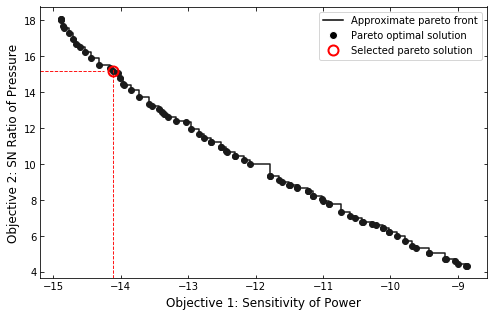

In [28]:
#https://esa.github.io/pagmo2/
import pygmo as pg
import numpy as np


class surrogate_model:
    
    def fitness(self, x):
        indiv = np.zeros((1,4)) #initialize np.array([0,0,0,0])
        for val in range(len(x)):
            indiv[:,val] = x[val] #convert individual[value value value value] to np.array([value,value,value,value])
        f1 = sm_power.predict_values(indiv)
        f2 = sm_pressure.predict_values(indiv)
        return [-f1[0][0], -f2[0][0]]
    
    def get_bounds(self):
        return ([0.0,15.15,-10.0,10],[4.0,20.0,10.0,14])
    
    def get_nobj(self):
        return 2

    def get_nix(self):
        return 1

random.seed(12)
prob = pg.problem(surrogate_model())
pop = pg.population(prob, size=80, seed=12)
algo = pg.algorithm(pg.nsga2(gen=250, m= 0.1, seed =12))
algo.set_verbosity(1)
algo.set_seed(12)
pop = algo.evolve(pop)
print(pop)

plt.figure(figsize=(8,5))
ax = pg.plot_non_dominated_fronts(pop.get_f())
ax.legend(['sadfasd'])
#plt.title("Pareto Front of the Last Generation") 
plt.plot(-14.115 , 15.149, marker='o', markeredgewidth=2,color='none',markeredgecolor='red', markersize=10, label='max power')
plt.legend(['selected'])
plt.xlabel('Objective 1: Sensitivity of Power', size=12)
plt.ylabel('Objective 2: SN Ratio of Pressure', size=12)

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='o', color='black', label='Approximate pareto front',markerfacecolor='none', markeredgecolor='none', markersize=8),
                  Line2D([0], [0], marker='o', color='w', label='Pareto optimal solution',markerfacecolor='black', markersize=8),
                   Line2D([0], [0], marker='o', markeredgewidth=2,color='none',markeredgecolor='red', markersize=10, label='Selected pareto solution')]
ax.legend(handles=legend_elements, loc='upper right')
ax.tick_params(axis = 'both' , direction='in', top='on', right='on')
ax.axvline(x=-14.1154, ymin=0, ymax= (15.149-4)/(18.5-4) , linestyle='--', linewidth = 0.9, color = 'red')
ax.axhline(y=15.149, xmin=0, xmax= (15 - 14.1154)/(15-8.8), linestyle='--', linewidth=0.9, color = 'red') 

uda = algo.extract(pg.nsga2)
print(uda.get_seed())
uda.get_log()
plt.show()

In [29]:
pop.get_log()

AttributeError: 'population' object has no attribute 'get_log'

In [ ]:
pg.sort_population_mo(points = pop.get_f())

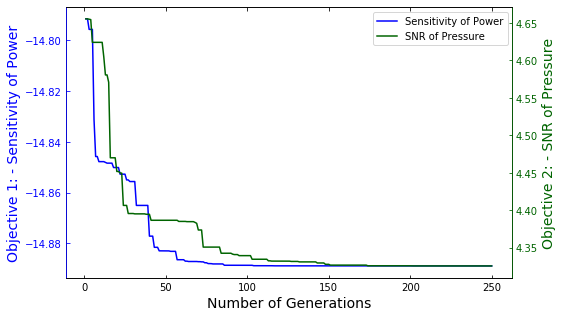

In [32]:
list_gen = []
list_power = []
list_pressure = []
for gen in range(len(uda.get_log())):
    num_gen = uda.get_log()[gen][0]
    val_power = uda.get_log()[gen][2][0]
    val_pressure = uda.get_log()[gen][2][1]
    
    list_gen.append(num_gen)
    list_power.append(val_power)
    list_pressure.append(val_pressure)

fig, ax1 = plt.subplots(figsize=(8,5))
ax2=ax1.twinx()

ax1.plot(list_gen,list_power, label = 'Sensitivity of Power',color='b')
ax2.plot(list_gen,list_pressure, label = 'SNR of Pressure',color='darkgreen')

ax1.set_xlabel('Number of Generations', size=14)
ax1.set_ylabel('Objective 1: - Sensitivity of Power', size=14, color='b')
ax2.set_ylabel('Objective 2: - SNR of Pressure', size=14, color='darkgreen')

ax2.spines['left'].set_color('b')
ax2.spines['right'].set_color('darkgreen')
ax1.tick_params(axis='y', colors='b')
ax2.tick_params(axis='y', colors='darkgreen')
ax1.tick_params(axis = 'both' , direction='in', top='on')
ax2.tick_params(axis = 'both' , direction='in', right='on')
fig.legend(loc='upper right', bbox_to_anchor=(0.89, 0.86))
plt.show()



In [ ]:
#Pareto Front's last generation
#pop.get_f()
#pop.get_x()
#abc = np.concatenate((pop.get_x(),pop.get_f()), axis=1)
#abc


In [ ]:
>>> import pygmo as pg
>>> # The problem
>>> prob = pg.problem(pg.rosenbrock(dim = 10))
>>> # The initial population
>>> pop = pg.population(prob, size = 20)
>>> # The algorithm (a self-adaptive form of Differential Evolution (sade - jDE variant)
>>> algo = pg.algorithm(pg.sade(gen = 1000))
>>> # The actual optimization process
>>> pop = algo.evolve(pop)
>>> # Getting the best individual in the population
>>> best_fitness = pop.get_f()[pop.best_idx()]
>>> print(best_fitness) 

In [ ]:
#https://esa.github.io/pagmo2/
import pygmo as pg
import numpy as np


class surrogate_model:
    
    def fitness(self, x):
        indiv = np.zeros((1,4)) #initialize np.array([0,0,0,0])
        for val in range(len(x)):
            indiv[:,val] = x[val] #convert individual[value value value value] to np.array([value,value,value,value])
        f1 = sm_power.predict_values(indiv)
        f2 = sm_pressure.predict_values(indiv)
        return [-f1[0][0], -f2[0][0]]
    
    def get_bounds(self):
        return ([0.0,15.15,-10.0,10],[4.0,20.0,10.0,14])
    
    def get_nobj(self):
        return 2

    def get_nix(self):
        return 1

random.seed(12)
prob = pg.problem(surrogate_model())
pop = pg.population(prob, size=8, seed=12)
algo = pg.algorithm(pg.nsga2(gen=1, m= 0.1, seed =12))
algo.set_verbosity(1)
algo.set_seed(12)
pop = algo.evolve(pop)
print(pop)

ax = pg.plot_non_dominated_fronts(pop.get_f()) 
plt.title("Pareto Front of the Last Generation") 
plt.xlabel('Objective 1: Slope of Power')
plt.ylabel('Objective 2: S/N Ratio of Pressure')


uda = algo.extract(pg.nsga2)
print(uda.get_seed())
uda.get_log()


In [ ]:
>>> import pygmo as pg
>>> # Instantiates a 4-objectives problem
>>> prob = pg.problem(pg.dtlz(prob_id=4, dim = 12, fdim=4))
>>> pop = pg.population(prob, 84)
>>> # Construct the hypervolume object
>>> # and get the reference point off-setted by 10 in each objective
>>> hv = pg.hypervolume(pop)
>>> offset = 5
>>> ref_point = hv.refpoint(offset = 0.1)
>>> hv.compute(ref_point) 
10.75643
>>> # Evolve the population some generations
>>> algo = pg.algorithm(pg.moead(gen=2000))
>>> pop = algo.evolve(pop)
>>> # Compute the hypervolume indicator again.
>>> # This time we expect a higher value as SMS-EMOA evolves the population
>>> # by trying to maximize the hypervolume indicator.
>>> hv = pg.hypervolume(pop)
>>> hv.compute(ref_point)